# Civitai API

https://github.com/civitai/civitai/wiki/REST-API-Reference

In module 4.0 we used the Stable Diffusion API to get information about models installed in webui.

In this module we will use the civitai API, to get information directly from civitai.com.


In [25]:
import hashlib
import requests
import pickle
from PIL import Image
import json
import io
import base64
import matplotlib.pyplot as plt
import random

## Model Versions by Hash

The Civitai API has the endpoint

https://civitai.com/api/v1/model-versions/by-hash/

Where you supply the hash code after the slash.  The hash algorithms you can use are: AutoV1, AutoV2, SHA256, CRC32, and Blake3

In module 4.1 we found the sha256 hash code of a version of the realistic vision model:

In [3]:
code = 'e5f3cbc5f7669457d3bec1fd492420995fb9a79e735dce438b81af61fd5d77f0'

In [4]:
url = 'https://civitai.com/api/v1/model-versions/by-hash/'+code

resp = requests.get(url)
resp.status_code

200

In [5]:
m = resp.json()
m

{'id': 245598,
 'modelId': 4201,
 'name': 'V6.0 B1 (VAE)',
 'createdAt': '2023-12-01T10:14:28.417Z',
 'updatedAt': '2024-01-20T16:25:03.484Z',
 'status': 'Published',
 'publishedAt': '2023-12-01T10:38:31.058Z',
 'trainedWords': [],
 'trainingStatus': None,
 'trainingDetails': None,
 'baseModel': 'SD 1.5',
 'baseModelType': 'Standard',
 'earlyAccessTimeFrame': 0,
 'description': '<ul><li><p>increased generation resolution to such resolutions as: 896x896, 768x1024, 640x1152, 1024x768, 1152x640. (note. in some cases there may still be mutations, duplications, etc -&gt; will be fixed in future versions).</p></li><li><p>improved sfw and nsfw for female and female anatomy (note. not all poses work correctly in such large resolutions -&gt; will be fixed in future versions).</p></li></ul>',
 'stats': {'downloadCount': 103933, 'ratingCount': 143, 'rating': 4.82},
 'model': {'name': 'Realistic Vision V6.0 B1',
  'type': 'Checkpoint',
  'nsfw': False,
  'poi': False},
 'files': [{'id': 192719,
  

The dict m has a key called images, and the corresponding value is a list:

In [6]:
print(type(m['images']))
print(len(m['images']))

<class 'list'>
10


Here is the first item in the list of images:

In [7]:
m['images'][0]

{'url': 'https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/1bb0b5cb-1249-4b84-bc9c-21029e002666/width=450/4077881.jpeg',
 'nsfw': 'None',
 'width': 768,
 'height': 1024,
 'hash': 'UAE2ILax0~-p.8Rj~VxZ9]xa^k9tEMfl-os:',
 'type': 'image',
 'metadata': {'hash': 'UAE2ILax0~-p.8Rj~VxZ9]xa^k9tEMfl-os:',
  'size': 456366,
  'width': 768,
  'height': 1024},
 'availability': 'Public',
 'meta': {'Size': '768x1024',
  'seed': 3108443162,
  'Model': 'Realistic_Vision_V6.0_NV_B1',
  'steps': 50,
  'hashes': {'model': 'acb7011e35'},
  'prompt': 'closeup portrait photo of beautiful 26 y.o woman, makeup, 8k uhd, high quality, dramatic, cinematic',
  'Version': 'v1.6.0-2-g4afaaf8a',
  'sampler': 'DPM++ 2M SDE',
  'cfgScale': 7,
  'resources': [{'hash': 'acb7011e35',
    'name': 'Realistic_Vision_V6.0_NV_B1',
    'type': 'model'}],
  'Model hash': 'acb7011e35',
  'negativePrompt': '(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime), text, cropped, out of fr

Each image has a url that we can use to download the image. When we download an image it is base64 encoded:

In [8]:
im = requests.get(m['images'][0]['url'])
im.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x06\x82Exif\x00\x00II*\x00\x08\x00\x00\x00\x01\x00i\x87\x04\x00\x01\x00\x00\x00\x1a\x00\x00\x00\x00\x00\x00\x00\x01\x00\x86\x92\x07\x00N\x06\x00\x00,\x00\x00\x00\x00\x00\x00\x00UNICODE\x00\x00c\x00l\x00o\x00s\x00e\x00u\x00p\x00 \x00p\x00o\x00r\x00t\x00r\x00a\x00i\x00t\x00 \x00p\x00h\x00o\x00t\x00o\x00 \x00o\x00f\x00 \x00b\x00e\x00a\x00u\x00t\x00i\x00f\x00u\x00l\x00 \x002\x006\x00 \x00y\x00.\x00o\x00 \x00w\x00o\x00m\x00a\x00n\x00,\x00 \x00m\x00a\x00k\x00e\x00u\x00p\x00,\x00 \x008\x00k\x00 \x00u\x00h\x00d\x00,\x00 \x00h\x00i\x00g\x00h\x00 \x00q\x00u\x00a\x00l\x00i\x00t\x00y\x00,\x00 \x00d\x00r\x00a\x00m\x00a\x00t\x00i\x00c\x00,\x00 \x00c\x00i\x00n\x00e\x00m\x00a\x00t\x00i\x00c\x00\n\x00N\x00e\x00g\x00a\x00t\x00i\x00v\x00e\x00 \x00p\x00r\x00o\x00m\x00p\x00t\x00:\x00 \x00(\x00d\x00e\x00f\x00o\x00r\x00m\x00e\x00d\x00 \x00i\x00r\x00i\x00s\x00,\x00 \x00d\x00e\x00f\x00o\x00r\x00m\x00e\x00d\x00 \x00p\x00u\x00p\x00i\x00l\x0

We can decode the image data to create an image object:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


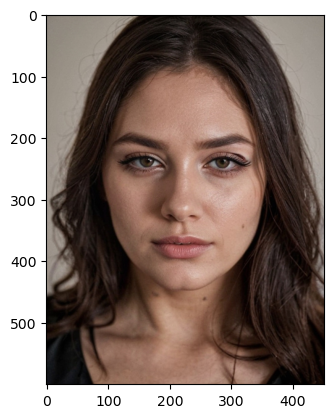

In [10]:
k = Image.open(io.BytesIO(im.content))
print(type(k))

plt.imshow(k);

Take a look at all 10:

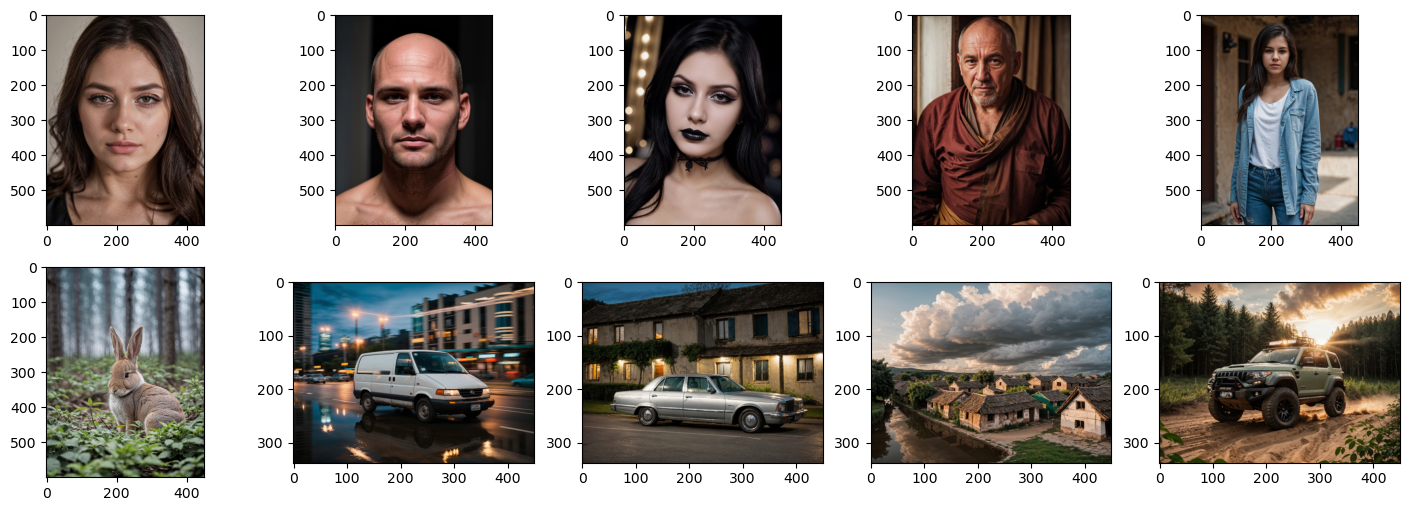

In [12]:
imgs = []

for i in m['images']:
    r = requests.get(i['url'])
    imgs.append(Image.open(io.BytesIO(r.content)))
    
fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(18,6))

for r in [0,1]:
    for c in [0,1,2,3,4]:
        ax[r,c].imshow(imgs[5*r+c])

## User SG_161222

From the civitai site I found that the user who created the realistic vision model has id SG_161222.

The civitai API has an endpoint images and you can specify the username.  The result will be images created by that user.

In [13]:
resp = requests.get('https://civitai.com/api/v1/images?username=SG_161222')
resp.status_code

200

In [30]:
v = resp.json()
v

{'items': [{'id': 1804575,
   'url': 'https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/1f4c40ba-2047-4ab5-9c14-95800d78d23b/width=640/1f4c40ba-2047-4ab5-9c14-95800d78d23b.jpeg',
   'hash': 'UFH1}L4:X+9ZRP?G.7tR?uR*Rk-:~WR-RQE1',
   'width': 640,
   'height': 960,
   'nsfwLevel': 'Soft',
   'nsfw': True,
   'createdAt': '2023-07-31T08:23:54.591Z',
   'postId': 447895,
   'stats': {'cryCount': 0,
    'laughCount': 22,
    'likeCount': 314,
    'dislikeCount': 0,
    'heartCount': 450,
    'commentCount': 24},
   'meta': {'Size': '640x960',
    'seed': 2233280225,
    'Model': 'Realistic_Vision_V5.1',
    'steps': 25,
    'hashes': {'model': 'ef76aa2332'},
    'prompt': 'instagram photo, closeup face photo of 23 y.o Chloe in black sweater, cleavage, pale skin, (smile:0.4), hard shadows',
    'Version': 'v1.5.1',
    'sampler': 'DPM++ SDE Karras',
    'cfgScale': 10,
    'resources': [{'hash': 'ef76aa2332',
      'name': 'Realistic_Vision_V5.1',
      'type': 'model'}],
    'Model hash': '

In [23]:
len(v['items'])

100

By default, the number of images to retrieve is limited to 100, and we hit that limit with this user.

I can see that the nsfwLevel for the first image in the list is 'Soft'.  I want to make of list of the images in the list where the nsfwLevel is 'None':

In [31]:
safeIds = []

for i,val in enumerate(v['items']):
    if val['nsfwLevel'] == 'None':
        safeIds.append(i)
    
len(safeIds)

74

74 of the 100 images are safe.

Download a random sample of 5 of the safe images:

In [32]:
imgs = []

for i in random.sample(safeIds,5):
    r = requests.get(v['items'][i]['url'])
    imgs.append(Image.open(io.BytesIO(r.content)))

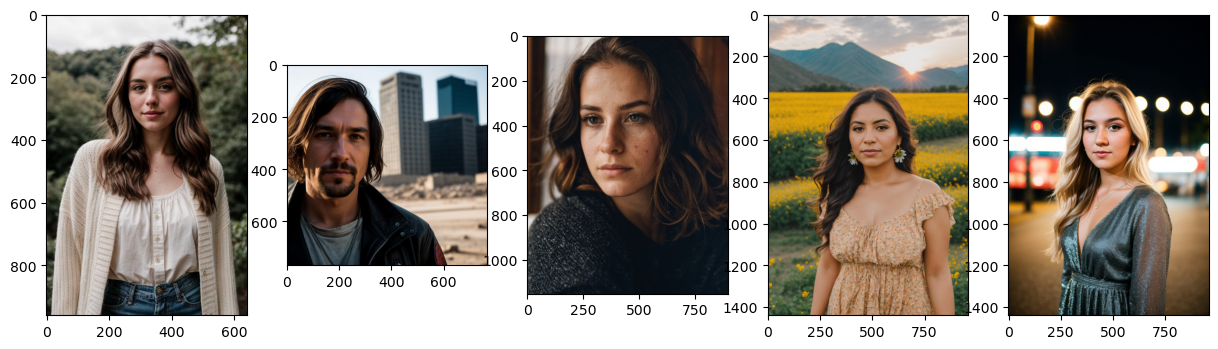

In [34]:
fig,ax = plt.subplots(ncols=5, figsize=(15,7))

for i in range(5):
    ax[i].imshow(imgs[i])